In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import  matplotlib.pyplot as plt

In [4]:
symbols = ["T", "F"]
start_date = "2021-01-01"
end_date = "2021-05-01"

stock_data = web.get_data_yahoo(symbols, start_date, end_date)

stock_data

Attributes  Adj Close             Close              High               Low  \
Symbols             T      F          T      F          T      F          T   
Date                                                                          
2021-01-04  28.441826   8.52  29.440001   8.52  29.490000   8.84  29.020000   
2021-01-05  28.267929   8.65  29.260000   8.65  29.750000   8.72  29.190001   
2021-01-06  28.818604   8.84  29.830000   8.84  30.000000   8.94  29.370001   
2021-01-07  28.895891   9.06  29.910000   9.06  30.090000   9.08  29.680000   
2021-01-08  28.532112   9.00  29.020000   9.00  29.209999   9.14  28.750000   
...               ...    ...        ...    ...        ...    ...        ...   
2021-04-26  30.910000  12.27  30.910000  12.27  31.379999  12.44  30.889999   
2021-04-27  30.770000  12.49  30.770000  12.49  30.879999  12.50  30.629999   
2021-04-28  30.959999  12.43  30.959999  12.43  31.150000  12.60  30.900000   
2021-04-29  31.340000  11.26  31.340000  11.26  31.530001  11.91  31.110001   
2021-04-30  31.410000  11.54  31.410000  11.54  31.430000  11.54  31.049999   

Attributes              Open             Volume               
Symbols         F          T      F           T            F  
Date                                                          
2021-01-04   8.43  29.389999   8.81  65484000.0   85043100.0  
2021-01-05   8.46  29.500000   8.47  62730000.0   70127800.0  
2021-01-06   8.68  29.410000   8.79  55480000.0   72590200.0  
2021-01-07   8.88  30.020000   8.94  53825800.0   77117100.0  
2021-01-08   8.89  29.139999   9.10  54736900.0   59162200.0  
...           ...        ...    ...         ...          ...  
2021-04-26  12.23  31.379999  12.28  45461300.0   40863800.0  
2021-04-27  12.27  30.840000  12.29  33392200.0   42037800.0  
2021-04-28  12.39  30.969999  12.60  28091400.0   68023400.0  
2021-04-29  11.14  31.129999  11.91  38477900.0  230430600.0  
2021-04-30  11.33  31.360001  11.36  31330800.0   90530000.0  

[82 rows x 12 columns]

In [5]:
stock_data['Adj Close']

Symbols,T,F
Date,,
2021-01-04,28.441826,8.52
2021-01-05,28.267929,8.65
2021-01-06,28.818604,8.84
2021-01-07,28.895891,9.06
2021-01-08,28.532112,9.00
...,...,...
2021-04-26,30.910000,12.27
2021-04-27,30.770000,12.49
2021-04-28,30.959999,12.43


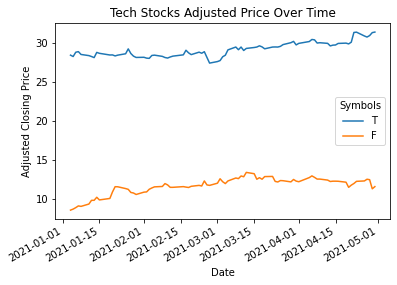

In [6]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()


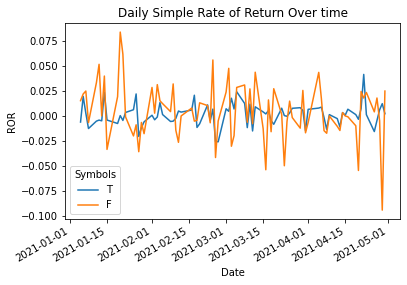

<Figure size 1152x648 with 0 Axes>

In [8]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

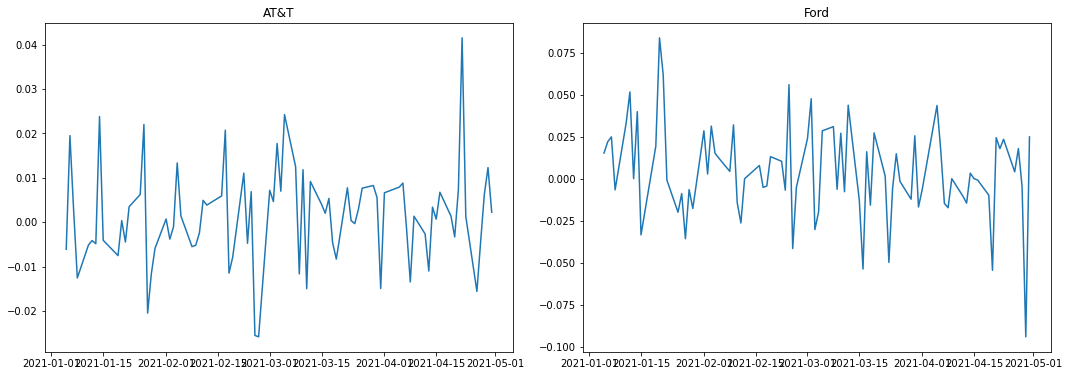

In [10]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax1.plot(stock_data['Adj Close']['T'].pct_change())
ax1.set_title("AT&T")
ax2.plot(stock_data['Adj Close']['F'].pct_change())
ax2.set_title("Ford")
plt.tight_layout()
plt.show()

In [11]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Symbols
T    0.001287
F    0.004145
dtype: float64

In [14]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1])

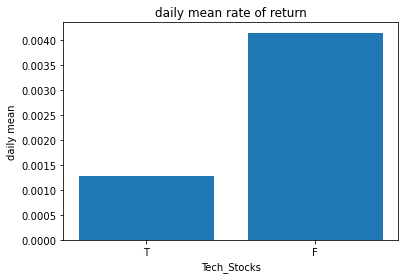

In [15]:
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

In [16]:
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
T    0.000124
F    0.000793
dtype: float64

In [17]:
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1])

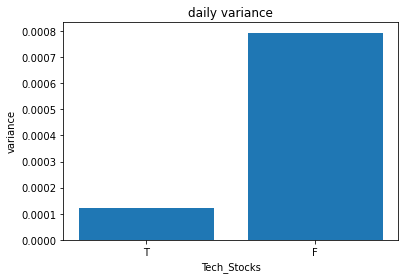

In [18]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()


In [20]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1])

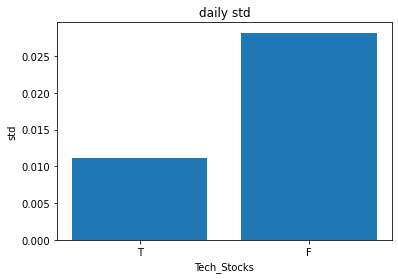

In [21]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

In [22]:
stock_data_daily_returns.corr()

Symbols,T,F
Symbols,,
T,1.000000,0.199879
F,0.199879,1.000000
